In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('week2.csv', index_col= 'Trade_Date')
df.head(3)

,Date,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Month,Year,price_volume,Day_Perc_Change,Trend
Trade_Date,,,,,,,,,,,,,,,,,,,,
2017-05-15,15-May-2017,MINDTREE,EQ,510.60,507.35,515.00,505.90,510.5,509.45,510.39,271952,1.388005e+08,8261,100362,36.90,5,2017,1.388016e+08,0.000000,No Change
2017-05-16,16-May-2017,MINDTREE,EQ,509.45,507.00,515.85,506.00,511.0,511.30,512.69,207011,1.061317e+08,5550,82090,39.65,5,2017,1.061325e+08,0.363137,No Change
2017-05-17,17-May-2017,MINDTREE,EQ,511.30,507.05,519.70,502.75,504.0,506.35,512.10,391401,2.004375e+08,13341,150098,38.35,5,2017,2.004365e+08,-0.968120,Slight Negative


In [3]:
df.drop(['Month', 'Year', 'price_volume', 'Symbol', 'Series'], axis=1, inplace= True)

## 2.1

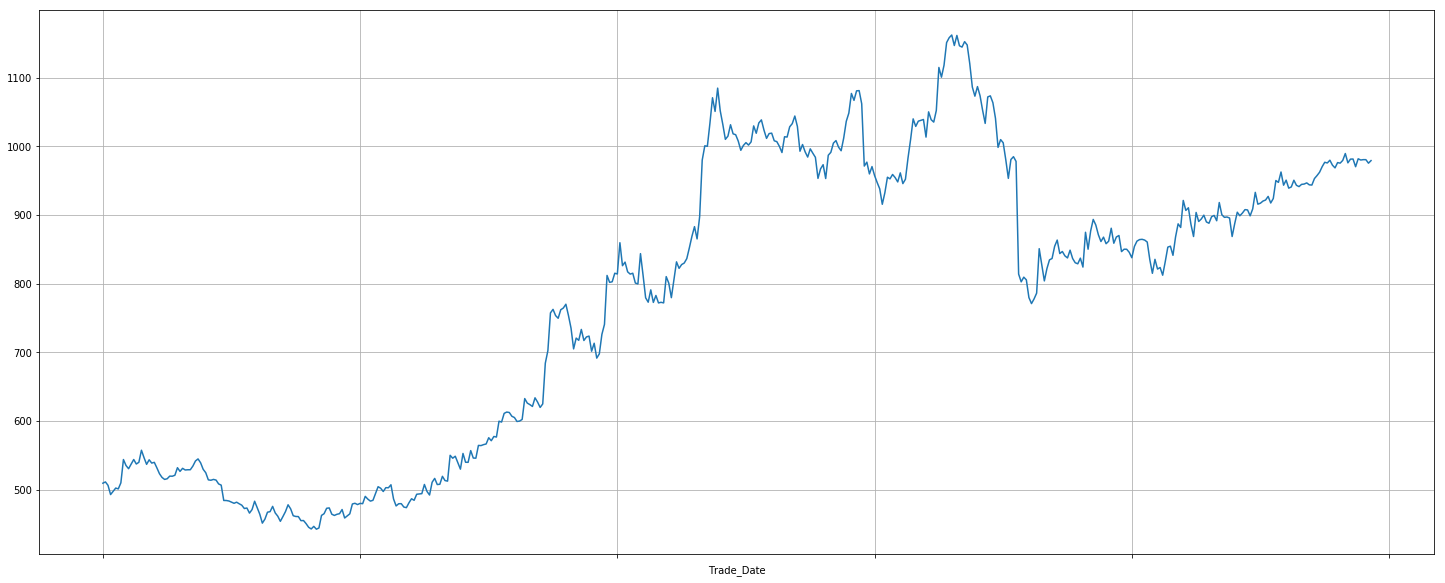

In [4]:
'''f, ax = plt.subplots(figsize = (25,10))
sns.pointplot(x = df.index, y = df['Close Price'] , color = 'blue')
plt.xticks(rotation = 45 )
plt.grid()
ax.set(xlabel = 'dates' , ylabel = 'Close Price', title = 'Close Price VS Dates')'''
df['Close Price'].plot(grid = True, figsize = (25, 10) , label = "Close Price Vs Date", use_index = True)

## 2.2

Text(0.5,1,'Daily change in of the stock price in percentage')

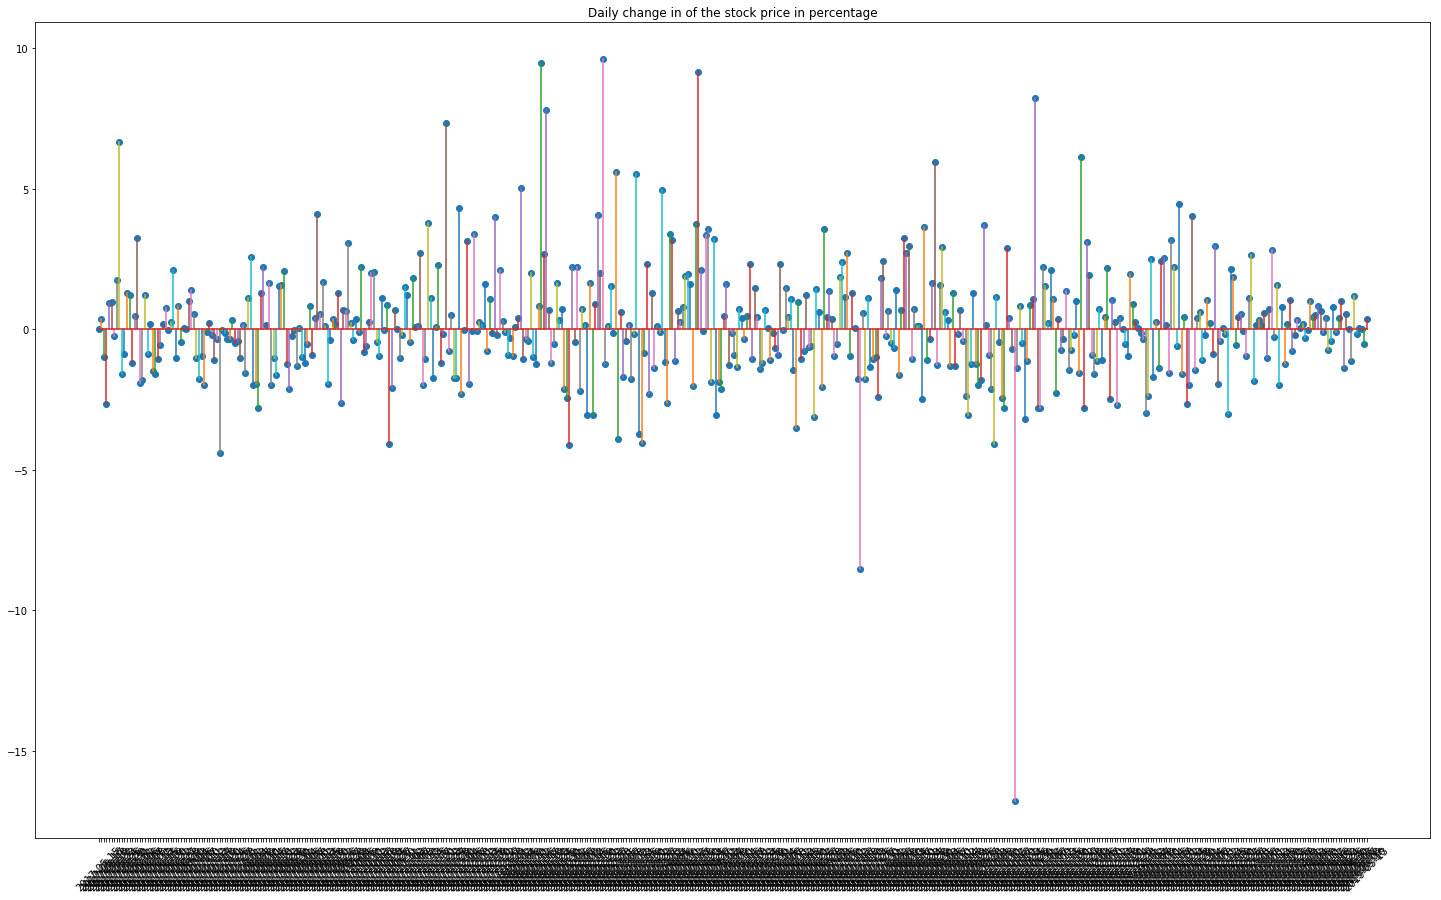

In [5]:
plt.figure(figsize= (25, 15))
plt.stem(df.index , df['Day_Perc_Change'], '-')
plt.xticks(rotation = 45)
plt.title("Daily change in of the stock price in percentage")

## 2.3

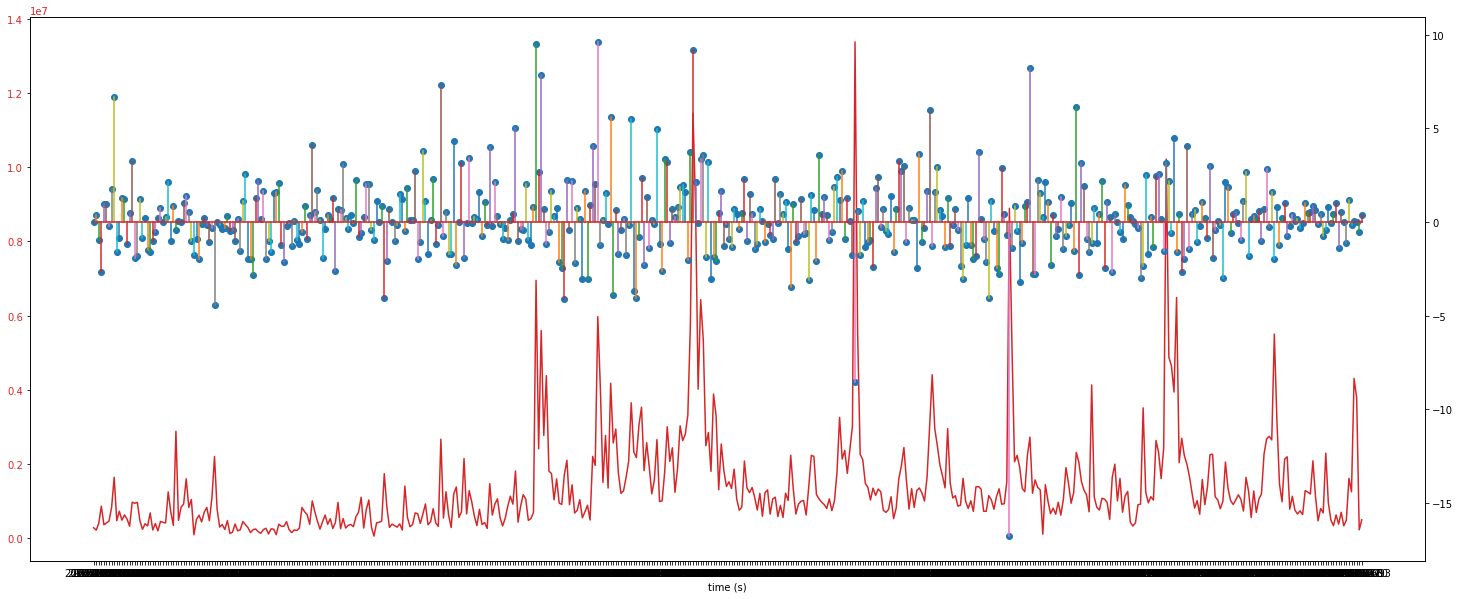

In [6]:
fig, ax1 = plt.subplots(figsize= (25,10))
color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.plot(df.index, df['Total Traded Quantity'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.stem(df.index , df['Day_Perc_Change'], '-')
#plt.legend(loc= 'upper left')
plt.show()

## 2.4

In [7]:
df1 = df.groupby('Trend').count()
df1.head(9)

,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Day_Perc_Change
Trend,,,,,,,,,,,,,,
Among Top Gainers,30,30,30,30,30,30,30,30,30,30,30,30,30,30
Among Top Losers,15,15,15,15,15,15,15,15,15,15,15,15,15,15
Bear Drop,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Bull run,6,6,6,6,6,6,6,6,6,6,6,6,6,6
Negative,114,114,114,114,114,114,114,114,114,114,114,114,114,114
No Change,142,142,142,142,142,142,142,142,142,142,142,142,142,142
Positive,97,97,97,97,97,97,97,97,97,97,97,97,97,97
Slight Negative,43,43,43,43,43,43,43,43,43,43,43,43,43,43
Slight Positive,45,45,45,45,45,45,45,45,45,45,45,45,45,45


In [8]:
explode = (0, 0 , 0,0,0,0.1,0,0,0)

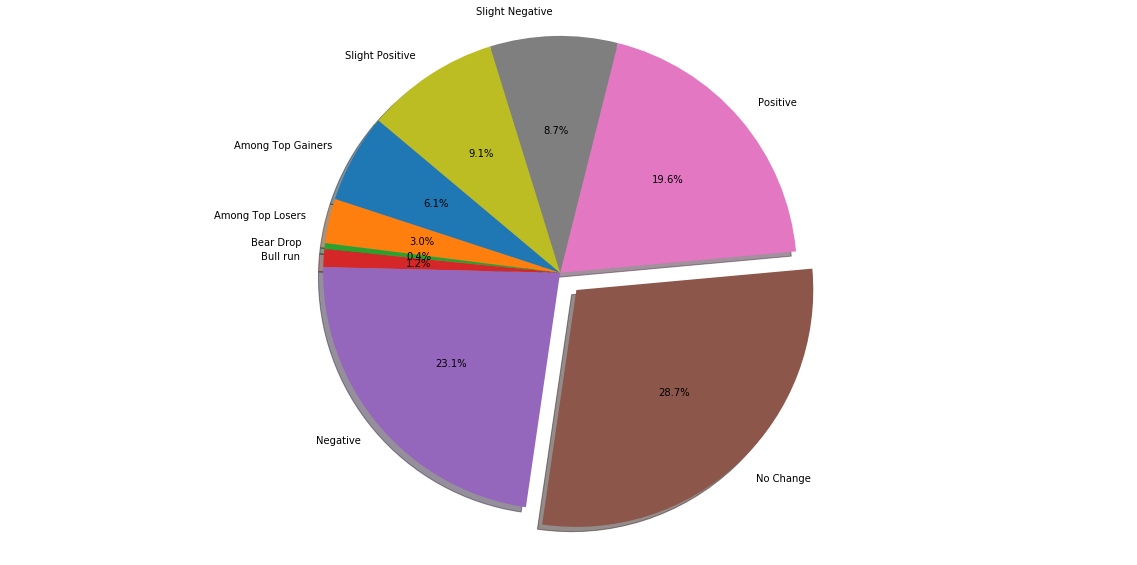

In [9]:
plt.figure(figsize = (20, 10))
plt.pie(df1['Date'], labels = df1.index, autopct='%1.1f%%', shadow=True, startangle=140, explode=explode)
plt.axis('equal')
plt.title("")
plt.show()

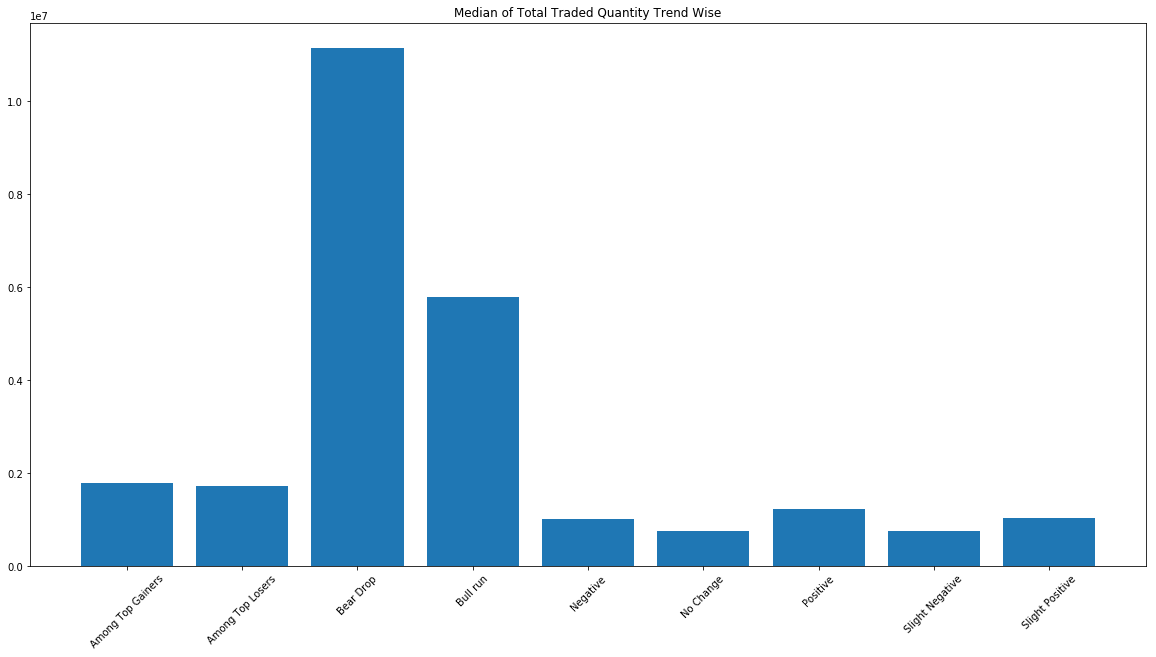

In [10]:
df2 = df.groupby('Trend', as_index= False)['Total Traded Quantity'].median()
plt.figure(figsize= (20, 10))
plt.bar(df2['Trend'], df2['Total Traded Quantity'])
plt.title("Median of Total Traded Quantity Trend Wise")
plt.xticks(rotation = 45, fontsize = 10)
plt.show()

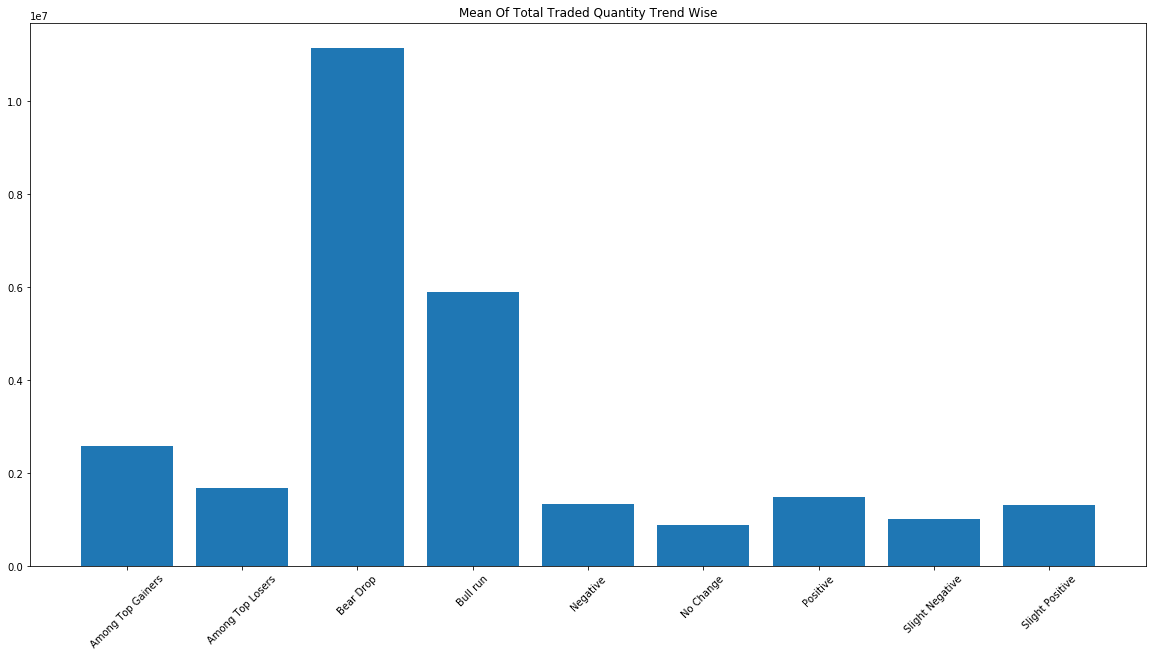

In [11]:
df3 = df.groupby('Trend', as_index= False)['Total Traded Quantity'].mean()
plt.figure(figsize= (20, 10))
plt.bar(df3['Trend'], df3['Total Traded Quantity'])
plt.title("Mean Of Total Traded Quantity Trend Wise")
plt.xticks(rotation = 45, fontsize = 10)
plt.show()

## 2.5

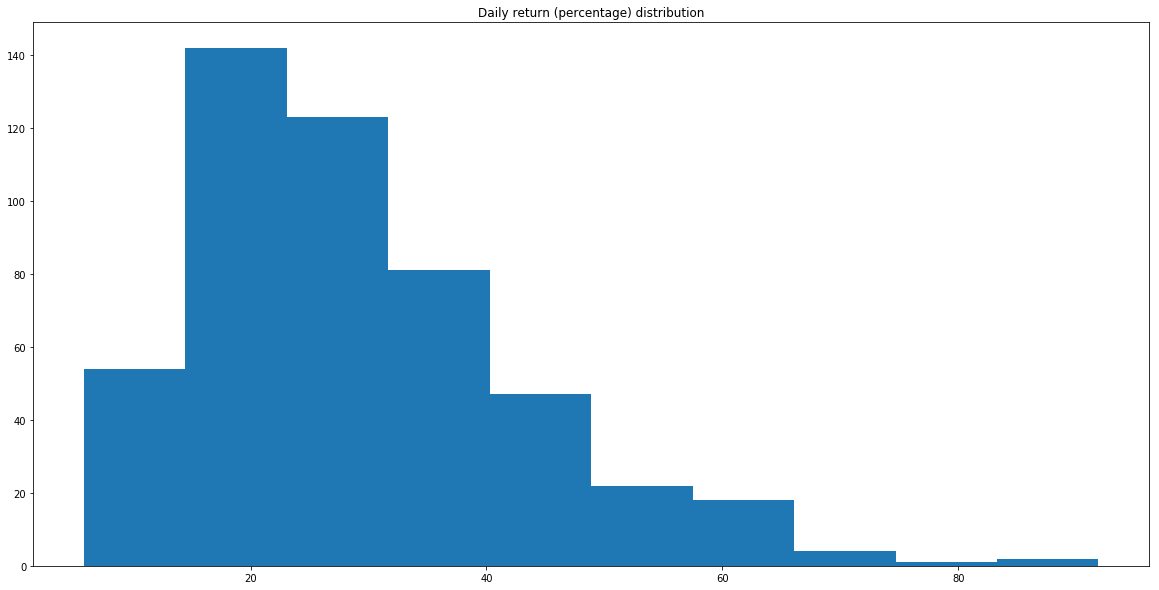

In [12]:
plt.figure(figsize= (20, 10))
plt.hist(df['% Dly Qt to Traded Qty'])
plt.title('Daily return (percentage) distribution')
plt.show()

## 2.6

In [13]:
dfa = pd.read_csv('ADANIPOWER.csv', parse_dates=True, index_col="Date")
dfb = pd.read_csv('APOLLOTYRE.csv', parse_dates=True, index_col="Date")
dfc = pd.read_csv('GODREJIND.csv', parse_dates=True, index_col="Date")
dfd = pd.read_csv("MINDTREE.csv", parse_dates=True, index_col="Date")
dfe = pd.read_csv('PNB.csv', parse_dates=True, index_col="Date")

In [14]:
dfa[dfa['Series'] == 'EQ']
dfb[dfb['Series'] == 'EQ']
dfc[dfc['Series'] == 'EQ']
dfd[dfd['Series'] == 'EQ']
dfe[dfe['Series'] == 'EQ']

data = {
    'ADANIPOWER' : dfa['Close Price'],
    'APOLLOTYRE' : dfb['Close Price'],
    'GODREJIND' : dfc['Close Price'],
    'MINDTREE' : dfd['Close Price'],
    'PNB' : dfe['Close Price']
}

dfn = pd.DataFrame(data)
dfn.tail(3)

,ADANIPOWER,APOLLOTYRE,GODREJIND,MINDTREE,PNB
Date,,,,,
2019-05-09,40.95,185.30,471.30,980.45,84.25
2019-05-10,41.45,190.95,471.20,975.35,86.25
2019-05-13,38.45,186.20,452.45,979.10,79.80


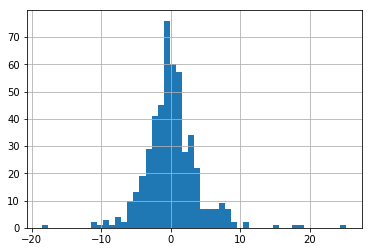

In [15]:
dfpct = dfn.pct_change()* 100
dfpct["ADANIPOWER"].hist(bins = 50)
dfpct.dropna(inplace= True)

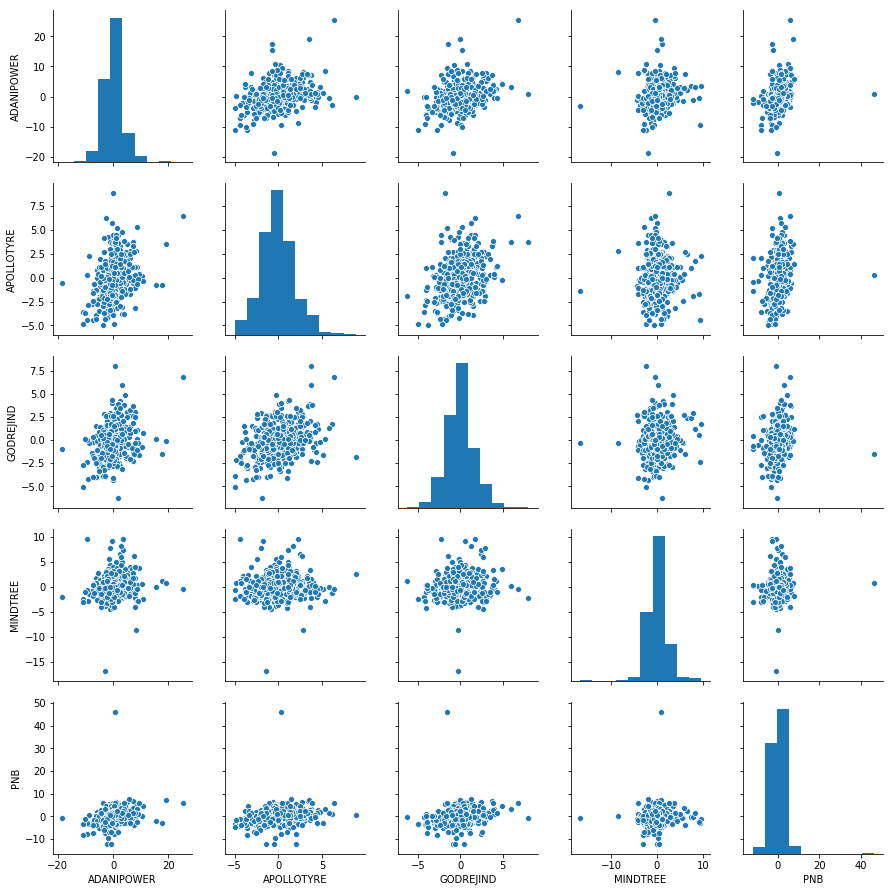

In [16]:
sns.pairplot(dfpct)
plt.show()

## 2.7

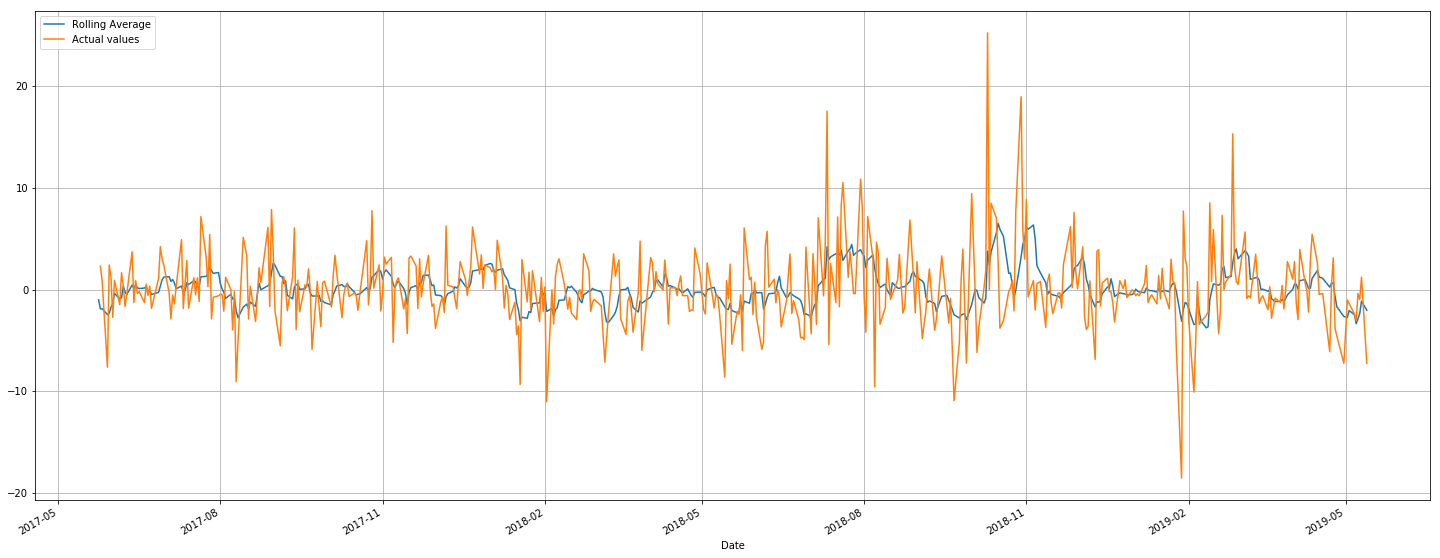

In [17]:
rol_avg = dfpct['ADANIPOWER'].rolling(7).mean()
rol_avg = pd.DataFrame(data = rol_avg)
rol_avg['ADANIPOWER'].plot(grid = True, figsize = (25, 10), legend= True, label = "Rolling Average")
plt.plot(dfpct['ADANIPOWER'][7:], label="Actual values")
plt.legend(loc="upper left")
plt.grid(True)

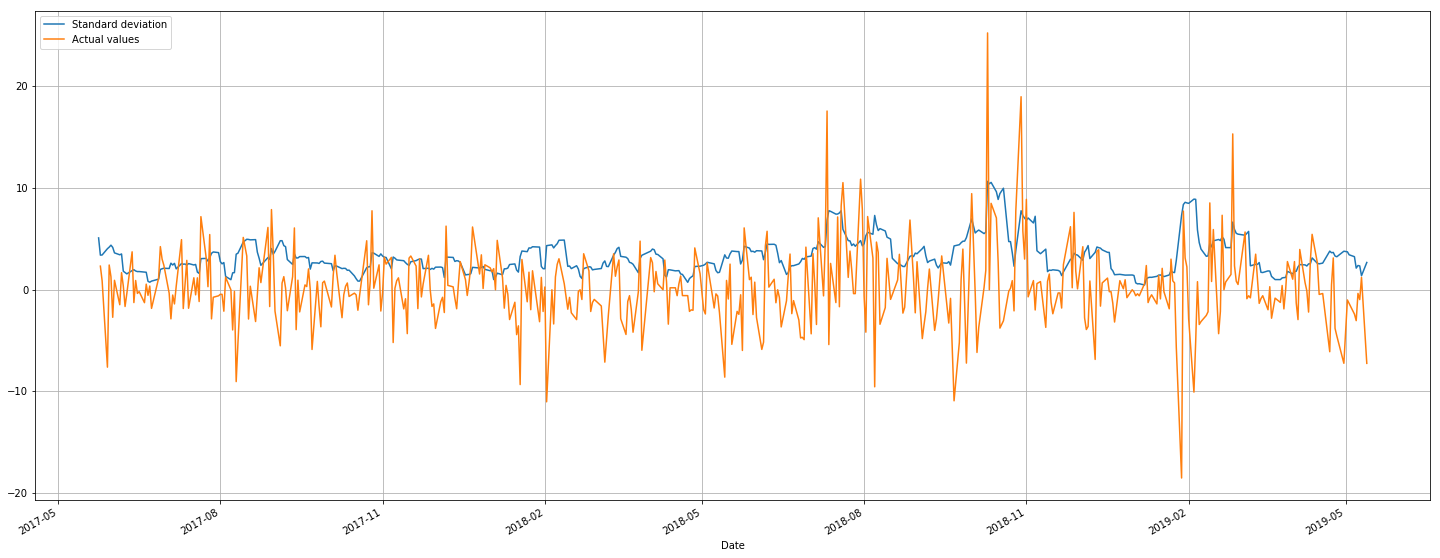

In [18]:
std = dfpct['ADANIPOWER'].rolling(7).std()
std = pd.DataFrame(data = std)
std['ADANIPOWER'].plot(grid =  True, figsize = (25, 10), legend = True, label = "Standard deviation")


plt.plot(dfpct['ADANIPOWER'][7:], label="Actual values")
plt.legend(loc="upper left")
plt.grid(True)

## 2.8

In [19]:
nif = pd.read_csv('Nifty50.csv', parse_dates=True, index_col= "Date" )
nif.drop(columns= ['Open', 'High', 'Low', 'Shares Traded' , 'Turnover (Rs. Cr)'], inplace= True)
nif.columns = ['Nifty']
nif.head(3)

,Nifty
Date,
2017-05-15,9445.40
2017-05-16,9512.25
2017-05-17,9525.75


In [20]:
nifpct = nif.pct_change()* 100
#nifpct["Nifty"].hist(bins = 50)
nifpct.dropna(inplace=True)
dfa1 = dfpct['ADANIPOWER'].to_frame().join(nifpct['Nifty'])

Text(0.5,1,'Volatility')

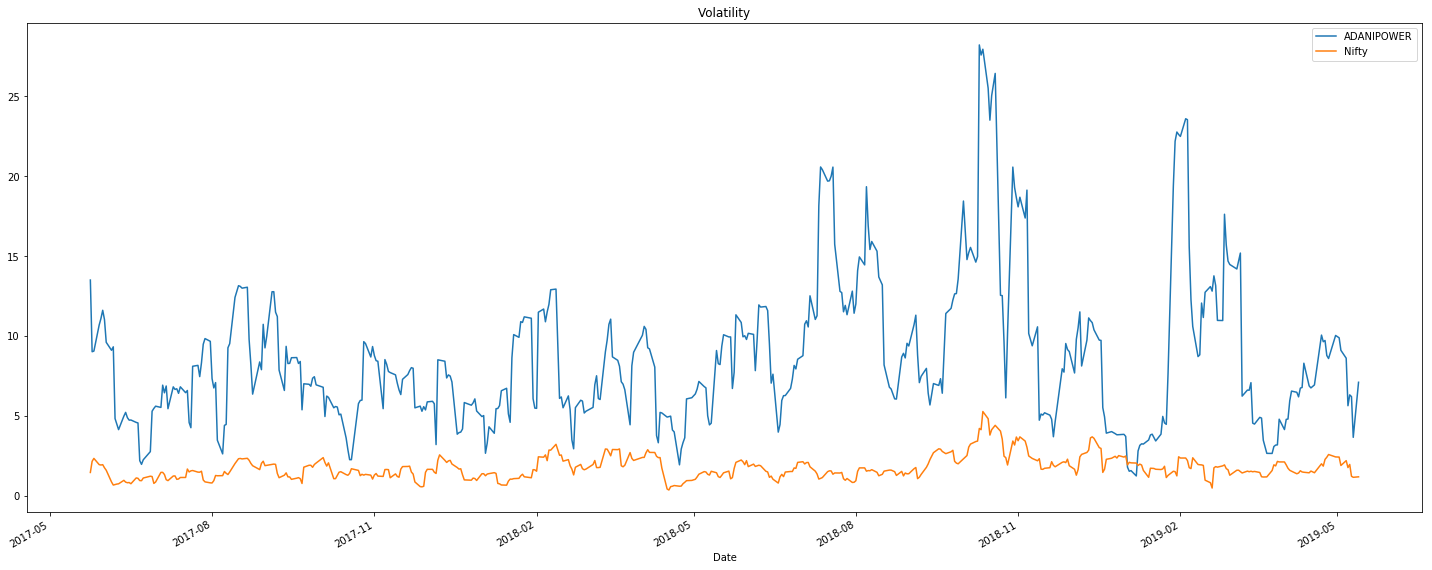

In [21]:
vol = dfa1.rolling(7).std() * np.sqrt(7)
vol.plot(figsize=(25, 10))
plt.title("Volatility")

## 2.9

In [22]:
dfa = dfa[['Average Price']]

In [23]:
dfa = dfa.reindex(index=dfa.index[::-1]) # Reverse for the moving average computation
dfa['Mavg21'] = dfa['Average Price'].rolling(window=21).mean()
dfa['Mavg34'] = dfa['Average Price'].rolling(window=34).mean()

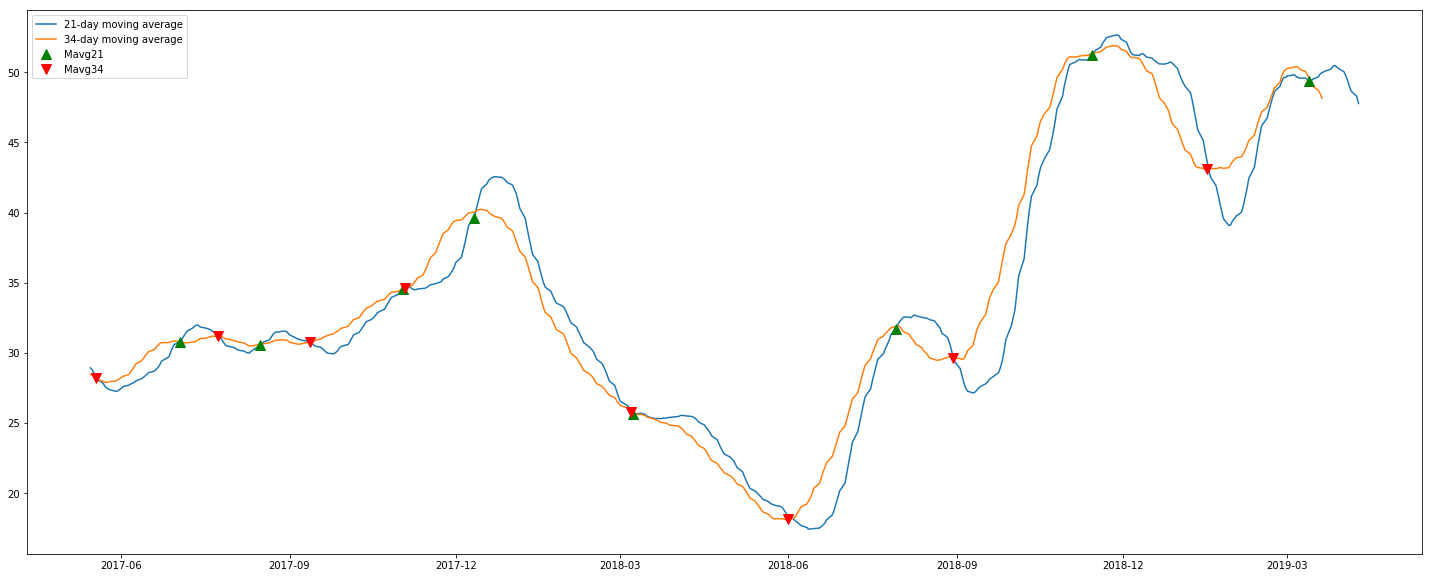

In [24]:
prev_short_mavg = dfa['Mavg21'].shift(1)
prev_long_mavg = dfa['Mavg34'].shift(1)
 
# Select buying and selling signals: where moving averages cross
buys = dfa.ix[(dfa['Mavg21'] <= dfa['Mavg34']) & (prev_short_mavg >= prev_long_mavg)]
sells = dfa.ix[(dfa['Mavg21'] >= dfa['Mavg34']) & (prev_short_mavg <= prev_long_mavg)]

plt.figure(figsize=(25,10))
#plt.plot(dfpct.index, dfpct['ADANIPOWER'], label='Original')
plt.plot(dfa.index, dfa['Mavg21'], label='21-day moving average')
plt.plot(dfa.index, dfa['Mavg34'], label='34-day moving average')

plt.plot(buys.index, dfa.ix[buys.index]['Mavg21'], '^', markersize=10, color='g')
plt.plot(sells.index, dfa.ix[sells.index]['Mavg34'], 'v', markersize=10, color='r')
plt.legend(loc=0)
plt.show()

## 2.10

In [36]:
upper_band.head(3)

,upper
Date,
2017-05-16,NaN
2017-05-17,NaN
2017-05-18,NaN


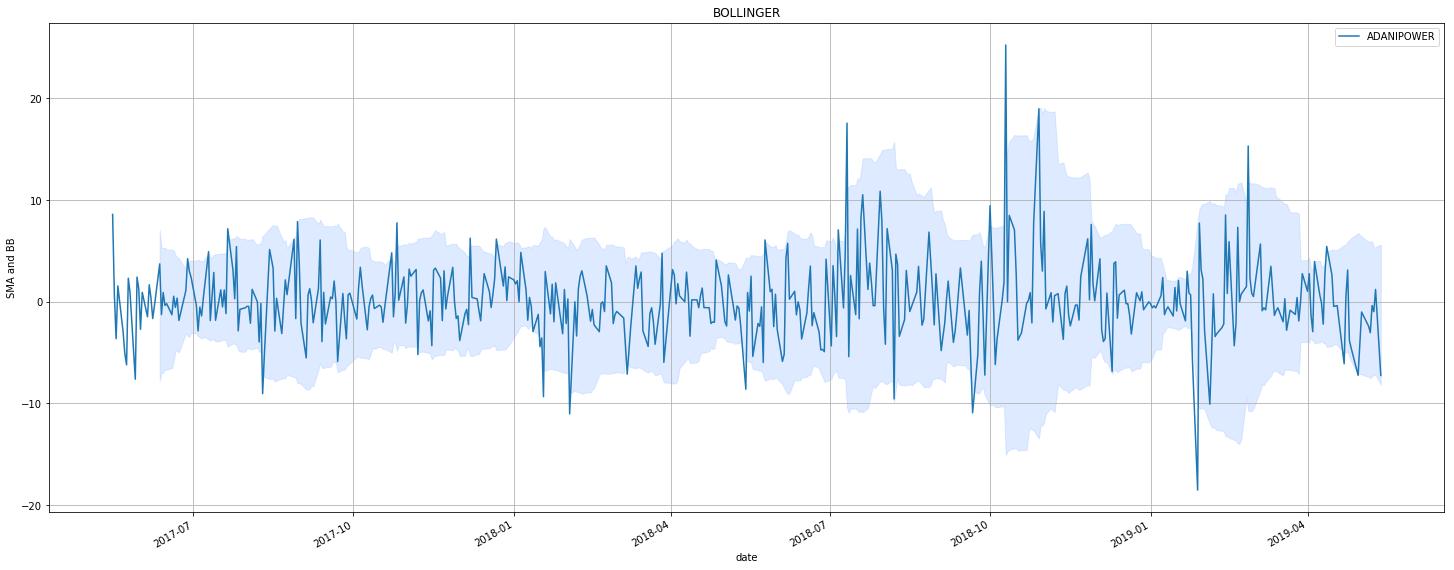

In [25]:
# calculate Simple Moving Average with 20 days window
sma = dfpct["ADANIPOWER"].rolling(window=20).mean()

# calculate the standar deviation
rstd = dfpct["ADANIPOWER"].rolling(window=20).std()

sma = pd.DataFrame(data = sma)
rstd = pd.DataFrame(data = rstd)

upper_band = sma + 2 * rstd
lower_band = sma - 2 * rstd
upper_band.columns = ['upper']
lower_band.columns = ['lower']
dff = dfpct[['ADANIPOWER']].copy()

k = pd.merge(pd.merge(dff,upper_band,on='Date'),lower_band,on='Date')

ax = dff.plot(title='BOLLINGER', figsize=(25, 10))
ax.fill_between(dff.index, lower_band['lower'], upper_band['upper'], color='#ADCCFF', alpha='0.4')
ax.set_xlabel('date')
ax.set_ylabel('SMA and BB')
ax.grid()
plt.show()

In [26]:
sma.columns = ['middle']

In [27]:
sma

,middle
Date,
2017-05-16,NaN
2017-05-17,NaN
2017-05-18,NaN
2017-05-19,NaN
2017-05-22,NaN
2017-05-23,NaN
2017-05-24,NaN
2017-05-25,NaN
2017-05-26,NaN


In [28]:
k

,ADANIPOWER,upper,lower
Date,,,
2017-05-16,8.595041,NaN,NaN
2017-05-17,0.761035,NaN,NaN
2017-05-18,-3.625378,NaN,NaN
2017-05-19,1.567398,NaN,NaN
2017-05-22,-2.932099,NaN,NaN
2017-05-23,-5.087440,NaN,NaN
2017-05-24,-6.197655,NaN,NaN
2017-05-25,2.321429,NaN,NaN
2017-05-26,0.872600,NaN,NaN


In [31]:
k.merge(sma, on ='Date')

TypeError: merge() got an unexpected keyword argument 'inplace'

In [30]:
k.head(3)

,ADANIPOWER,upper,lower
Date,,,
2017-05-16,8.595041,NaN,NaN
2017-05-17,0.761035,NaN,NaN
2017-05-18,-3.625378,NaN,NaN


In [36]:
k.to_csv('bollinger.csv')